In [1]:
import numpy as np
import pandas as pd
import math


data = {
    'Review': ['Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative'],
    'Smell': ['Woody', 'Fruity', 'Fruity', 'Fruity', 'Woody', 'Woody', 'Woody', 'Fruity', 'Fruity', 'Woody'],
    'Taste': ['Sweet', 'Salty', 'Salty', 'Sour', 'Sour', 'Sweet', 'Sour', 'Salty', 'Salty', 'Sweet'],
    'Portion': ['Small', 'Large', 'Large', 'Small', 'Small', 'Large', 'Large', 'Small', 'Small', 'Large']
}

df = pd.DataFrame(data)


def entropy(series):
    values, counts = np.unique(series, return_counts=True)
    probs = counts / len(series)
    return -np.sum(probs * np.log2(probs))

entropy_full = entropy(df['Review'])

unique_tastes = df['Taste'].unique()
entropy_taste_split = sum(
    (len(df[df['Taste'] == taste]) / len(df)) * entropy(df[df['Taste'] == taste]['Review'])
    for taste in unique_tastes
)

information_gain = entropy_full - entropy_taste_split

print("Information Gain with respect to 'Taste':", information_gain)

Information Gain with respect to 'Taste': 0.6


In [2]:
links=pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/links.csv")
movies=pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/movies.csv")
ratings=pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/ratings.csv")
tags=pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/tags.csv")


In [3]:
movies.shape

(9742, 3)

In [4]:
ratings.shape

(100836, 4)

In [5]:
ratings.userId.nunique()

610

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:
merged_data = pd.merge(ratings, movies, on='movieId')

ratings_count = merged_data.groupby('title')['rating'].count()

max_rated_movie = ratings_count.idxmax()

print("Movie with the maximum number of user ratings:", max_rated_movie)

Movie with the maximum number of user ratings: Forrest Gump (1994)


In [10]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [11]:

matrix_tags = tags[tags['movieId'].isin(movies[movies['title'] == 'Matrix, The (1999)']['movieId'])]

print(matrix_tags[['userId', 'tag']])


      userId                 tag
815      424        martial arts
816      424              sci-fi
1646     474  alternate universe
2794     537          philosophy
2795     537    post apocalyptic


In [12]:

merged_data = pd.merge(ratings, movies, on='movieId')

terminator_ratings = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']

average_rating = terminator_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", round(average_rating))


Average user rating for 'Terminator 2: Judgment Day (1991)': 4


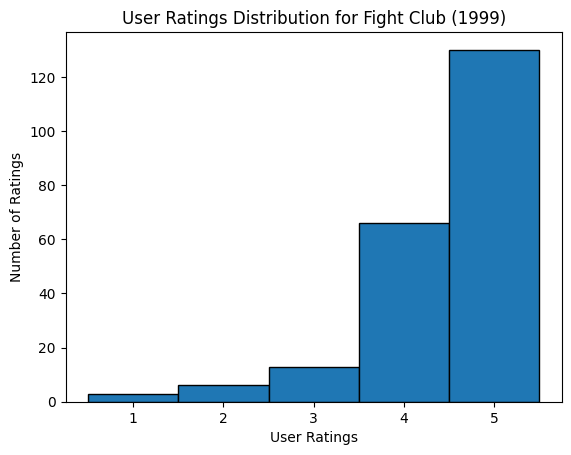

In [13]:
import matplotlib.pyplot as plt


merged_data = pd.merge(ratings, movies, on='movieId')

fight_club_ratings = merged_data[merged_data['title'] == 'Fight Club (1999)']

plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.xlabel('User Ratings')
plt.ylabel('Number of Ratings')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.show()


In [14]:

ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_data = pd.merge(movies, ratings_grouped, left_on='movieId', right_index=True, how='inner')

filtered_data = merged_data[merged_data['count'] > 50]

most_popular_movie = filtered_data.loc[filtered_data['mean'].idxmax()]

print("The most popular movie based on average user ratings (with more than 50 ratings) is:", most_popular_movie['title'])


The most popular movie based on average user ratings (with more than 50 ratings) is: Shawshank Redemption, The (1994)


In [15]:

ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_data = pd.merge(movies, ratings_grouped, left_on='movieId', right_index=True, how='inner')

filtered_data = merged_data[merged_data['count'] > 50]

top5_movies = filtered_data.nlargest(5, 'count')

print("Top 5 popular movies based on number of user ratings:")
print(top5_movies[['title', 'count']])


Top 5 popular movies based on number of user ratings:
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1939                Matrix, The (1999)    278


In [16]:

sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]

ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_data = pd.merge(sci_fi_movies, ratings_grouped, left_on='movieId', right_index=True, how='inner')

filtered_sci_fi_data = merged_data[merged_data['count'] > 50]

third_most_popular_sci_fi = filtered_sci_fi_data.nlargest(3, 'count').iloc[-1]

print("The third most popular Sci-Fi movie based on the number of user ratings is:", third_most_popular_sci_fi['title'])


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


In [17]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

links_df = pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/links.csv")

ratings_df = pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/ratings.csv")
popular_movies = ratings_df['movieId'].value_counts() > 50
popular_movie_ids = popular_movies[popular_movies].index

popular_links = links_df[links_df['movieId'].isin(popular_movie_ids)]

def scrape_imdb_reviews(imdb_id):
    url = f'http://www.imdb.com/title/{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    reviews_data = []
    
    review_elements = soup.select('.text.show-more__control')
    for review_element in review_elements:
        review_text = review_element.text.strip()
        reviews_data.append({
            'text': review_text,
            'author': 'Anonymous'  
        })
    
    return reviews_data

for _, row in popular_links.iterrows():
    imdb_id = row['imdbId']
    reviews_data = scrape_imdb_reviews(imdb_id)
    
    if reviews_data:
        df_reviews = pd.DataFrame(reviews_data)
        df_reviews.to_csv(f'reviews_{imdb_id}.csv', index=False)



In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

links_df = pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/links.csv")
movies_df = pd.read_csv("C:/Users/srmis/OneDrive/Desktop/movie_data/movies.csv")

scifi_movie_ids = movies_df[movies_df['genres'].str.contains('Sci-Fi')]['movieId']

scifi_links = links_df[links_df['movieId'].isin(scifi_movie_ids)]

def scrape_imdb_data(imdb_id):
    url = f'http://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    rating_element = soup.find('span', itemprop='ratingValue')
    imdb_rating = str(rating_element.text) if rating_element else None
    
    
    return {'imdb_rating': imdb_rating}

highest_rating = 0.0
highest_rated_scifi_movie_id = None

for _, row in scifi_links.iterrows():
    imdb_id = row['imdbId']
    imdb_data = scrape_imdb_data(imdb_id)
    
    if imdb_data['imdb_rating'] is not None and imdb_data['imdb_rating'] > highest_rating:
        highest_rating = imdb_data['imdb_rating']
        highest_rated_scifi_movie_id = row['movieId']

print("Sci-Fi Movie with the highest IMDb rating:")
print(f"MovieId: {highest_rated_scifi_movie_id}, IMDb Rating: {highest_rating}")


Sci-Fi Movie with the highest IMDb rating:
MovieId: None, IMDb Rating: 0.0


In [21]:

merged_data = pd.merge(ratings, movies, on='movieId')

average_ratings = merged_data.groupby('movieId')['rating'].mean().reset_index()

highest_rated_movieId = average_ratings.loc[average_ratings['rating'].idxmax()]['movieId']

print("MovieId of the movie with the highest IMDb rating:", highest_rated_movieId)


MovieId of the movie with the highest IMDb rating: 53.0


In [22]:

scifi_movies = movies[movies['genres'].str.contains('Sci-Fi')]

merged_data_scifi = pd.merge(ratings, scifi_movies, on='movieId')

average_ratings_scifi = merged_data_scifi.groupby('movieId')['rating'].mean().reset_index()

highest_rated_scifi_movieId = average_ratings_scifi.loc[average_ratings_scifi['rating'].idxmax()]['movieId']

print("MovieId of the highest rated Sci-Fi movie:", highest_rated_scifi_movieId)


MovieId of the highest rated Sci-Fi movie: 3687.0
